In [91]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel(r'C:\Users\20220604\Traffic_Plz.xlsx',sheet_name=None)

In [7]:
df.keys()

dict_keys(['Graph_AvgDAY', 'SUM_Traffic2'])

In [191]:
df_2020 = pd.read_excel(r'C:\Users\20220604\Traffic 2563.xlsx',sheet_name='Data')
df_2019 = pd.read_excel(r'C:\Users\20220604\Traffic 2562.xlsx',sheet_name='Data')


In [192]:
df_2019.head()

,Sector,Plaza,Plaza_en,Date,typ_day,day_nm,Daily Traffic
0,FES,ดินแดง,DD,2019-01-01,HD,TUE,45023
1,FES,ดินแดง,DD,2019-01-02,WD,WED,53381
2,FES,ดินแดง,DD,2019-01-03,WD,THU,53900
3,FES,ดินแดง,DD,2019-01-04,WD,FRI,54973
4,FES,ดินแดง,DD,2019-01-05,SAT,SAT,48187


In [260]:
df_2020 = df_2020[df_2020.typ_day != 'FD']

In [261]:
df_traffic_sector_2019 = df_2019.groupby(['Sector','Date']).sum().reset_index()
df_traffic_sector_2020 = df_2020.groupby(['Sector','Date']).sum().reset_index()

In [262]:
df_traffic_sector_2020 = df_traffic_sector_2020.rename(columns = {'Daily Traffic':'volume_2020'})
df_traffic_sector_2019 = df_traffic_sector_2019.rename(columns = {'Daily Traffic':'volume_2019'})


In [263]:
df_traffic_sector_2020['date/month'] = df_traffic_sector_2020['Date'].dt.date.astype(str).str[5:]
df_traffic_sector_2019['date/month'] = df_traffic_sector_2019['Date'].dt.date.astype(str).str[5:]  

In [264]:
df_traffic_sector_2020.head()

,Sector,Date,volume_2020,date/month
0,A,2020-01-01,159884,01-01
1,A,2020-01-02,191331,01-02
2,A,2020-01-03,211314,01-03
3,A,2020-01-04,192111,01-04
4,A,2020-01-05,190990,01-05


In [265]:
df_traffic_sector = df_traffic_sector_2020.merge(df_traffic_sector_2019,on = ['Sector','date/month'],how='left')
df_traffic_sector.head()

,Sector,Date_x,volume_2020,date/month,Date_y,volume_2019
0,A,2020-01-01,159884,01-01,2019-01-01,168186.0
1,A,2020-01-02,191331,01-02,2019-01-02,205821.0
2,A,2020-01-03,211314,01-03,2019-01-03,218912.0
3,A,2020-01-04,192111,01-04,2019-01-04,232663.0
4,A,2020-01-05,190990,01-05,2019-01-05,204414.0


In [266]:
df_traffic_sector['percent_diff'] = (df_traffic_sector['volume_2020'] - df_traffic_sector['volume_2019'])/df_traffic_sector['volume_2019']*100

In [267]:
df_traffic_sector.head()

,Sector,Date_x,volume_2020,date/month,Date_y,volume_2019,percent_diff
0,A,2020-01-01,159884,01-01,2019-01-01,168186.0,-4.936202
1,A,2020-01-02,191331,01-02,2019-01-02,205821.0,-7.040098
2,A,2020-01-03,211314,01-03,2019-01-03,218912.0,-3.470801
3,A,2020-01-04,192111,01-04,2019-01-04,232663.0,-17.429501
4,A,2020-01-05,190990,01-05,2019-01-05,204414.0,-6.567065


In [268]:
df_traffic_sector.isnull().sum()

Sector          0
Date_x          0
volume_2020     0
date/month      0
Date_y          7
volume_2019     7
percent_diff    7
dtype: int64

In [269]:
df_traffic_sector[df_traffic_sector['percent_diff'].isnull() == True]

,Sector,Date_x,volume_2020,date/month,Date_y,volume_2019,percent_diff
59,A,2020-02-29,197711,02-29,NaT,NaN,NaN
408,B,2020-02-29,81452,02-29,NaT,NaN,NaN
757,C,2020-02-29,170073,02-29,NaT,NaN,NaN
1106,C+,2020-02-29,83562,02-29,NaT,NaN,NaN
1455,D,2020-02-29,178241,02-29,NaT,NaN,NaN
1804,FES,2020-02-29,311301,02-29,NaT,NaN,NaN
2153,SOE,2020-02-29,57746,02-29,NaT,NaN,NaN


In [270]:
df_traffic_sector_notnull = df_traffic_sector[df_traffic_sector['percent_diff'].isnull() == False]
df_traffic_sector_notnull.head()

,Sector,Date_x,volume_2020,date/month,Date_y,volume_2019,percent_diff
0,A,2020-01-01,159884,01-01,2019-01-01,168186.0,-4.936202
1,A,2020-01-02,191331,01-02,2019-01-02,205821.0,-7.040098
2,A,2020-01-03,211314,01-03,2019-01-03,218912.0,-3.470801
3,A,2020-01-04,192111,01-04,2019-01-04,232663.0,-17.429501
4,A,2020-01-05,190990,01-05,2019-01-05,204414.0,-6.567065


In [271]:
df_gg_mobility = pd.read_csv(r'C:\Users\20220604\2020_TH_Region_Mobility_Report.csv')

In [272]:
df_gg_mobility.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,TH,Thailand,NaN,NaN,NaN,NaN,NaN,ChIJsU1CR_eNTTARAuhXB4gs154,2020-02-15,-3,1,-8,-2,7,1
1,TH,Thailand,NaN,NaN,NaN,NaN,NaN,ChIJsU1CR_eNTTARAuhXB4gs154,2020-02-16,-3,2,-5,-4,2,2
2,TH,Thailand,NaN,NaN,NaN,NaN,NaN,ChIJsU1CR_eNTTARAuhXB4gs154,2020-02-17,-3,1,-3,-4,2,1
3,TH,Thailand,NaN,NaN,NaN,NaN,NaN,ChIJsU1CR_eNTTARAuhXB4gs154,2020-02-18,-3,0,-5,-6,0,2
4,TH,Thailand,NaN,NaN,NaN,NaN,NaN,ChIJsU1CR_eNTTARAuhXB4gs154,2020-02-19,-4,-3,-3,-6,0,1


In [273]:
df_gg_mobility.date = pd.to_datetime(df_gg_mobility['date'], format='%Y-%m-%d')

In [274]:
df_gg_mobility.dtypes

country_region_code                                           object
country_region                                                object
sub_region_1                                                 float64
sub_region_2                                                 float64
metro_area                                                   float64
iso_3166_2_code                                              float64
census_fips_code                                             float64
place_id                                                      object
date                                                  datetime64[ns]
retail_and_recreation_percent_change_from_baseline             int64
grocery_and_pharmacy_percent_change_from_baseline              int64
parks_percent_change_from_baseline                             int64
transit_stations_percent_change_from_baseline                  int64
workplaces_percent_change_from_baseline                        int64
residential_percent_change_from_ba

In [275]:
df_joined = df_traffic_sector_notnull.merge(df_gg_mobility,how='left',left_on = 'Date_x',right_on = 'date')

In [276]:
df_joined.head()

,Sector,Date_x,volume_2020,date/month,Date_y,volume_2019,percent_diff,country_region_code,country_region,sub_region_1,...,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,A,2020-01-01,159884,01-01,2019-01-01,168186.0,-4.936202,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,A,2020-01-02,191331,01-02,2019-01-02,205821.0,-7.040098,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,A,2020-01-03,211314,01-03,2019-01-03,218912.0,-3.470801,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,A,2020-01-04,192111,01-04,2019-01-04,232663.0,-17.429501,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,A,2020-01-05,190990,01-05,2019-01-05,204414.0,-6.567065,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [277]:
df_joined.head()

,Sector,Date_x,volume_2020,date/month,Date_y,volume_2019,percent_diff,country_region_code,country_region,sub_region_1,...,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,A,2020-01-01,159884,01-01,2019-01-01,168186.0,-4.936202,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,A,2020-01-02,191331,01-02,2019-01-02,205821.0,-7.040098,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,A,2020-01-03,211314,01-03,2019-01-03,218912.0,-3.470801,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,A,2020-01-04,192111,01-04,2019-01-04,232663.0,-17.429501,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,A,2020-01-05,190990,01-05,2019-01-05,204414.0,-6.567065,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [278]:
df_joined.Sector.unique()

array(['A', 'B', 'C', 'C+', 'D', 'FES', 'SOE'], dtype=object)

In [279]:
df_joined_notnull = df_joined[df_joined.country_region_code.isnull() == False]
df_joined_notnull.head()

,Sector,Date_x,volume_2020,date/month,Date_y,volume_2019,percent_diff,country_region_code,country_region,sub_region_1,...,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
45,A,2020-02-15,206853,02-15,2019-02-15,242838.0,-14.818521,TH,Thailand,NaN,...,NaN,NaN,ChIJsU1CR_eNTTARAuhXB4gs154,2020-02-15,-3.0,1.0,-8.0,-2.0,7.0,1.0
46,A,2020-02-16,189104,02-16,2019-02-16,211442.0,-10.564599,TH,Thailand,NaN,...,NaN,NaN,ChIJsU1CR_eNTTARAuhXB4gs154,2020-02-16,-3.0,2.0,-5.0,-4.0,2.0,2.0
47,A,2020-02-17,219793,02-17,2019-02-17,193752.0,13.440377,TH,Thailand,NaN,...,NaN,NaN,ChIJsU1CR_eNTTARAuhXB4gs154,2020-02-17,-3.0,1.0,-3.0,-4.0,2.0,1.0
48,A,2020-02-18,222188,02-18,2019-02-18,225472.0,-1.456500,TH,Thailand,NaN,...,NaN,NaN,ChIJsU1CR_eNTTARAuhXB4gs154,2020-02-18,-3.0,0.0,-5.0,-6.0,0.0,2.0
49,A,2020-02-19,225541,02-19,2019-02-19,172239.0,30.946534,TH,Thailand,NaN,...,NaN,NaN,ChIJsU1CR_eNTTARAuhXB4gs154,2020-02-19,-4.0,-3.0,-3.0,-6.0,0.0,1.0


In [280]:
df_joined_notnull[df_joined_notnull.Sector == 'A'].head()

,Sector,Date_x,volume_2020,date/month,Date_y,volume_2019,percent_diff,country_region_code,country_region,sub_region_1,...,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
45,A,2020-02-15,206853,02-15,2019-02-15,242838.0,-14.818521,TH,Thailand,NaN,...,NaN,NaN,ChIJsU1CR_eNTTARAuhXB4gs154,2020-02-15,-3.0,1.0,-8.0,-2.0,7.0,1.0
46,A,2020-02-16,189104,02-16,2019-02-16,211442.0,-10.564599,TH,Thailand,NaN,...,NaN,NaN,ChIJsU1CR_eNTTARAuhXB4gs154,2020-02-16,-3.0,2.0,-5.0,-4.0,2.0,2.0
47,A,2020-02-17,219793,02-17,2019-02-17,193752.0,13.440377,TH,Thailand,NaN,...,NaN,NaN,ChIJsU1CR_eNTTARAuhXB4gs154,2020-02-17,-3.0,1.0,-3.0,-4.0,2.0,1.0
48,A,2020-02-18,222188,02-18,2019-02-18,225472.0,-1.456500,TH,Thailand,NaN,...,NaN,NaN,ChIJsU1CR_eNTTARAuhXB4gs154,2020-02-18,-3.0,0.0,-5.0,-6.0,0.0,2.0
49,A,2020-02-19,225541,02-19,2019-02-19,172239.0,30.946534,TH,Thailand,NaN,...,NaN,NaN,ChIJsU1CR_eNTTARAuhXB4gs154,2020-02-19,-4.0,-3.0,-3.0,-6.0,0.0,1.0


In [283]:
df_joined_notnull.to_excel(r'C:\Users\20220604\dataforcorrelation.xlsx')

In [284]:
from scipy import stats

In [285]:
x = df_joined_notnull[df_joined_notnull.Sector == 'A'].percent_diff
y = df_joined_notnull[df_joined_notnull.Sector == 'A'].retail_and_recreation_percent_change_from_baseline
stats.pearsonr(x,y)

(0.7678531237012423, 3.6642414019588576e-60)

In [286]:
sectors = df_joined_notnull.Sector.unique()
sectors

array(['A', 'B', 'C', 'C+', 'D', 'FES', 'SOE'], dtype=object)

In [287]:
mobility = ['retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline',\
'parks_percent_change_from_baseline',
'transit_stations_percent_change_from_baseline',
'workplaces_percent_change_from_baseline',
'residential_percent_change_from_baseline']
mobility

['retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline']

In [288]:
r_value = []
sec_ls = []
mobility_ls = []
print('Start Runnning')
for sec in sectors:
    for m in mobility:
        x = df_joined_notnull[df_joined_notnull.Sector == sec].percent_diff
        y = df_joined_notnull[df_joined_notnull.Sector == sec][m]
        cal = stats.pearsonr(x,y)
        print(f'sector : {sec}, mobility: {m} ',cal)
        r_value.append(cal[0])
        sec_ls.append(sec)
        mobility_ls.append(m)
print('Complete')


Start Runnning
sector : A, mobility: retail_and_recreation_percent_change_from_baseline  (0.7678531237012423, 3.6642414019588576e-60)
sector : A, mobility: grocery_and_pharmacy_percent_change_from_baseline  (0.6242203397558046, 3.928822156011085e-34)
sector : A, mobility: parks_percent_change_from_baseline  (0.6834331616656186, 4.880955828987726e-43)
sector : A, mobility: transit_stations_percent_change_from_baseline  (0.7517823897848647, 2.24479344478848e-56)
sector : A, mobility: workplaces_percent_change_from_baseline  (0.3885050755670163, 2.3479966568805758e-12)
sector : A, mobility: residential_percent_change_from_baseline  (-0.6746975998196744, 1.3587819400542254e-41)
sector : B, mobility: retail_and_recreation_percent_change_from_baseline  (0.615732992109227, 5.217857471548027e-33)
sector : B, mobility: grocery_and_pharmacy_percent_change_from_baseline  (0.47661529466074737, 1.3698826637814006e-18)
sector : B, mobility: parks_percent_change_from_baseline  (0.5403297862614935, 2.

In [289]:
df_final  = pd.DataFrame({'sectors':sec_ls,'Mobility':mobility_ls,'R-value':r_value})
df_final

,sectors,Mobility,R-value
0,A,retail_and_recreation_percent_change_from_base...,0.767853
1,A,grocery_and_pharmacy_percent_change_from_baseline,0.624220
2,A,parks_percent_change_from_baseline,0.683433
3,A,transit_stations_percent_change_from_baseline,0.751782
4,A,workplaces_percent_change_from_baseline,0.388505
5,A,residential_percent_change_from_baseline,-0.674698
6,B,retail_and_recreation_percent_change_from_base...,0.615733
7,B,grocery_and_pharmacy_percent_change_from_baseline,0.476615
8,B,parks_percent_change_from_baseline,0.540330
9,B,transit_stations_percent_change_from_baseline,0.632269


In [290]:
df_final.to_excel(r'C:\Users\20220604\correlation.xlsx')

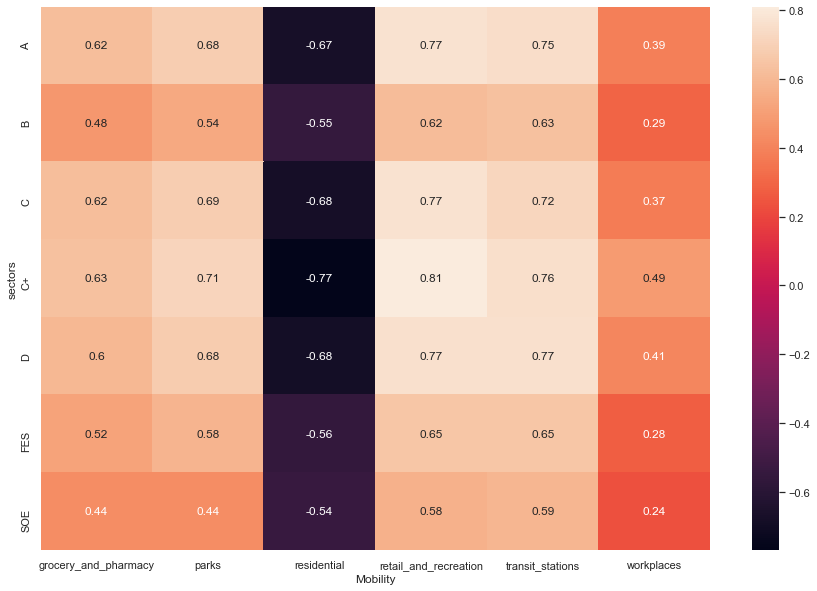

In [303]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.set(font="Arial")
old_col_name = [
                'grocery_and_pharmacy_percent_change_from_baseline',
                'parks_percent_change_from_baseline',
                'residential_percent_change_from_baseline',
                'retail_and_recreation_percent_change_from_baseline',
                'transit_stations_percent_change_from_baseline',
                'workplaces_percent_change_from_baseline'            
               ]

new_col_name = ['grocery_and_pharmacy','parks','residential','retail_and_recreation','transit_stations','workplaces']
col_change = dict(zip(old_col_name,new_col_name))

df_pivot = pd.pivot_table(df_final,columns='Mobility',index='sectors',values='R-value')
df_pivot = df_pivot.rename(columns = col_change)
sns.heatmap(df_pivot, annot=True)
